<a href="https://colab.research.google.com/github/deep08032000/grade-calculator/blob/main/Creditcard_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

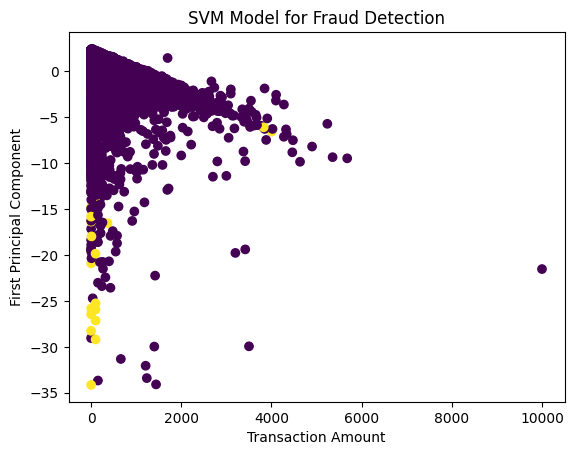

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

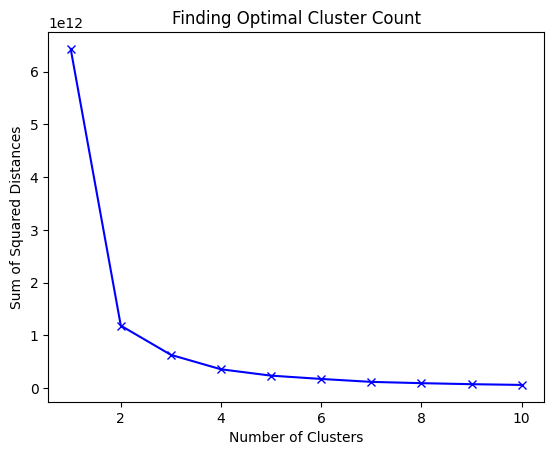

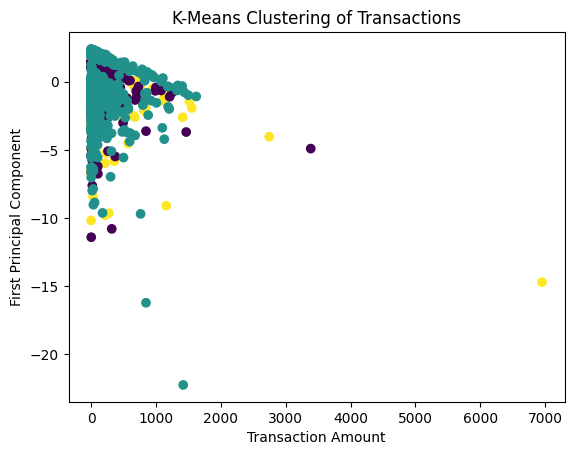

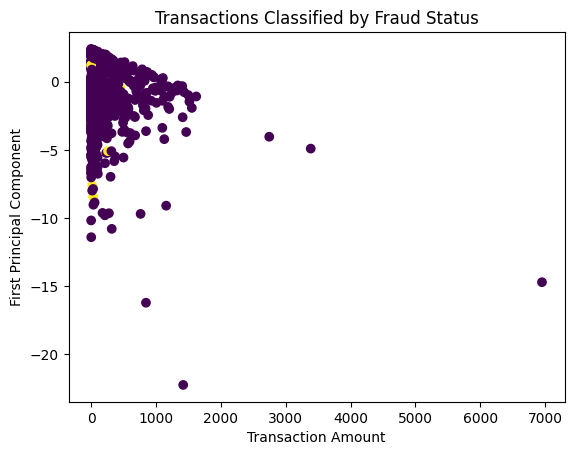

Confusion Matrix:
[[56854     7]
 [   22    79]]
Model Accuracy: 0.9994908886626171


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

class FraudDetectionModel:
    def svm_training(self):
        # Loading the dataset
        dataset = pd.read_csv('/content/creditcard.csv')
        # Separating features and target
        input_features = dataset.drop(columns=['Class'])
        output_target = dataset['Class']
        # Splitting the data into training and testing sets
        train_inputs, test_inputs, train_outputs, test_outputs = train_test_split(input_features, output_target, test_size=0.2, random_state=42)
        # Training the Support Vector Machine (SVM) model
        svm_model = SVC(kernel='linear')
        svm_model.fit(train_inputs, train_outputs)
        # Predicting and visualizing the results
        predictions = svm_model.predict(test_inputs)
        plt.scatter(test_inputs['Amount'], test_inputs['V1'], c=predictions)
        plt.xlabel('Transaction Amount')
        plt.ylabel('First Principal Component')
        plt.title('SVM Model for Fraud Detection')
        plt.show()

    def kmeans_clustering(self):
        # Loading the dataset
        dataset = pd.read_csv('/content/creditcard.csv')
        # Sampling the data to reduce computational load
        sampled_dataset = dataset.iloc[::100, :]
        cluster_inertias = []
        # Determining the optimal number of clusters using the elbow method
        for cluster_count in range(1, 11):
            kmeans_model = KMeans(n_clusters=cluster_count)
            kmeans_model.fit(sampled_dataset)
            cluster_inertias.append(kmeans_model.inertia_)
        plt.plot(range(1, 11), cluster_inertias, 'bx-')
        plt.xlabel('Number of Clusters')
        plt.ylabel('Sum of Squared Distances')
        plt.title('Finding Optimal Cluster Count')
        plt.show()
        # Applying K-Means clustering
        final_kmeans = KMeans(n_clusters=3, n_init=10)
        cluster_labels = final_kmeans.fit_predict(sampled_dataset)
        plt.scatter(sampled_dataset['Amount'], sampled_dataset['V1'], c=cluster_labels)
        plt.title('K-Means Clustering of Transactions')
        plt.xlabel('Transaction Amount')
        plt.ylabel('First Principal Component')
        plt.show()
        # Visualizing the original data with fraud status
        plt.scatter(sampled_dataset['Amount'], sampled_dataset['V1'], c=sampled_dataset['Class'])
        plt.title('Transactions Classified by Fraud Status')
        plt.xlabel('Transaction Amount')
        plt.ylabel('First Principal Component')
        plt.show()

    def random_forest_classifier(self):
        # Loading the dataset
        dataset = pd.read_csv('/content/creditcard.csv')
        # Separating features and target
        input_features = dataset.drop(columns=['Class']).values
        output_target = dataset['Class'].values
        # Splitting the data into training and testing sets
        train_inputs, test_inputs, train_outputs, test_outputs = train_test_split(input_features, output_target, test_size=0.2, random_state=0)
        # Training the Random Forest classifier
        rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
        rf_model.fit(train_inputs, train_outputs)
        # Predicting and evaluating the model
        predictions = rf_model.predict(test_inputs)
        print("confusion matrix:")
        print(confusion_matrix(test_outputs, predictions))
        print("model accuracy:", accuracy_score(test_outputs, predictions))

if __name__ == '__main__':
    # Instantiate and run the model
    fraud_detection = FraudDetectionModel()
    fraud_detection.svm_training()
    fraud_detection.kmeans_clustering()
    fraud_detection.random_forest_classifier()
